#IS 470 Lab 7: SVM and Neural Network

---

##Part 1. SVM and Neural Network for Numeric Prediction
<br>
In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower, 
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>

Target variable: **expenses**

### Upload and clean data

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [82]:
# Read data
insurance = pd.read_csv("/content/drive/MyDrive/IS470_data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [83]:
# Show the head rows of a data frame
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [84]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [85]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [86]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

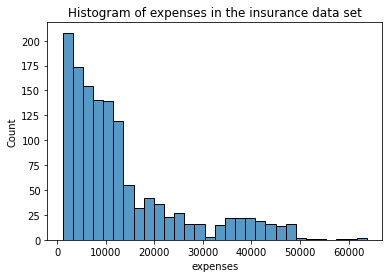

In [87]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

In [88]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


### Partition the data set

In [89]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,0,1,0
1336,21,25.8,0,2007.95,0,0,0,0,1


In [90]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train_insurance, predictors_test_insurance, target_train_insurance, target_test_insurance = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_insurance.shape, predictors_test_insurance.shape, target_train_insurance.shape, target_test_insurance.shape)

(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

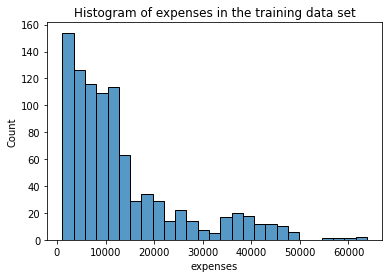

In [91]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train_insurance)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

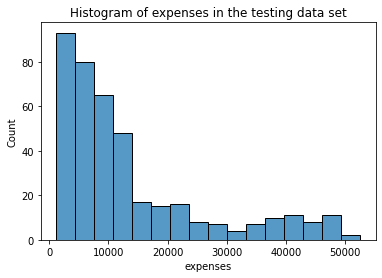

In [92]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test_insurance)
snsplot.set_title("Histogram of expenses in the testing data set")

### SVM model

In [93]:
# Build a SVM model with default setting (C = 1.0)
model_SVM1 = SVR()
model_SVM1.fit(predictors_train_insurance, target_train_insurance)

SVR()

In [94]:
# Make predictions on testing data
prediction_on_test_insurance = model_SVM1.predict(predictors_test_insurance)

In [95]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8674.695576543052
RMSE: 13175.419298851317


In [96]:
# Build a SVM model with C = 10.0
model_SVM2 = SVR(C = 10.0)
model_SVM2.fit(predictors_train_insurance, target_train_insurance)

SVR(C=10.0)

In [97]:
# Make predictions on testing data (0.5 points)
prediction_on_test_insurance = model_SVM2.predict(predictors_test_insurance)

In [98]:
# Examine the evaluation results on testing data: MAE and RMSE (0.5 points)
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8351.694901193036
RMSE: 13139.615173118493


In [99]:
# Build a SVM model with C = 100.0 (0.5 points)
model_SVM3 = SVR(C = 100.0)
model_SVM3.fit(predictors_train_insurance, target_train_insurance)

SVR(C=100.0)

In [100]:
# Make predictions on testing data (0.5 points)
prediction_on_test_insurance = model_SVM3.predict(predictors_test_insurance)

In [101]:
# Examine the evaluation results on testing data: MAE and RMSE (0.5 points)
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 6999.272056756078
RMSE: 13386.317466855004


Q1. Which C value provides the best performance? (0.5 points)<br>
C = 100 provides the best performance, because it has a much lower MAE value.

Q2. How dose the cost parameter C impact SVM model performance? (0.5 points)<br>
As we increase the C value, the MAE is lower and RMSE is slightly higher.

Q3. Assume that you will lose each dollar your model’s prediction misses due to an over-estimation or under-estimation. Which evaluation metric you should use? (0.5 points)<br>
MAE

Q4. Assume that the penalty for an erroneous prediction increases with the difference between the actual and predicted values. Which evaluation metric you should use? (0.5 points)<br>
RMSE

### MLP model

In [102]:
#Build MLP model contains two hidden layers: 16 hidden nodes for the first layer, and 8 hidden nodes for the second layer. Set random_state=1.
model_MLP1 = MLPRegressor(hidden_layer_sizes=(16,8), random_state=1)
model_MLP1.fit(predictors_train_insurance, target_train_insurance)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [103]:
# Make predictions on testing data
prediction_on_test_insurance = model_MLP1.predict(predictors_test_insurance)

In [104]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8839.039197684291
RMSE: 11807.625278012829


In [105]:
# Build MLP model contains three hidden layers: 8 hidden nodes for the first layer, 4 hidden nodes for the second layer, and 4 hidden nodes for the third layer. Set random_state=1.
model_MLP2 = MLPRegressor(hidden_layer_sizes=(8,4,4), random_state=1)
model_MLP2.fit(predictors_train_insurance, target_train_insurance)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(8, 4, 4), random_state=1)

In [106]:
# Make predictions on testing data (0.5 points)
prediction_on_test_insurance = model_MLP2.predict(predictors_test_insurance)

In [107]:
# Examine the evaluation results on testing data: MAE and RMSE (0.5 points)
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8427.704633364938
RMSE: 11993.153909886738


##Part 2. SVM and Neural Network for classification
<br>
This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>


Target variable: **IsBadBuy**

### Upload and clean data

In [108]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [109]:
# Read data
carAuction = pd.read_csv("/content/drive/MyDrive/IS470_data/carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [110]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [111]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [112]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [113]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

###2. Partition the data set

In [114]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,2871,5300,8,75419,869,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Yes,1840,3600,8,82944,2322,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,No,8931,7500,4,57338,588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,8320,8500,5,55909,1169,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,No,11520,10100,5,86702,853,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,7536,6600,4,85377,983,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,No,4921,7000,7,89665,1543,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9997,No,9263,9000,4,59383,1417,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,No,3240,5500,4,48642,482,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [115]:
# Partition the data
target = carAuction['IsBadBuy']
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train_car, predictors_test_car, target_train_car, target_test_car = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_car.shape, predictors_test_car.shape, target_train_car.shape, target_test_car.shape)

(7000, 39) (3000, 39) (7000,) (3000,)


In [116]:
# Examine the porportion of target variable for training data set
print(target_train_car.value_counts(normalize=True))

No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [117]:
# Examine the porportion of target variable for testing data set
print(target_test_car.value_counts(normalize=True))

No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


### SVM model

In [127]:
# Build a SVM model with default setting (C = 1.0) (0.5 points)
model_SVM4 = SVC(C = 1.0)
model_SVM4.fit(predictors_train_car, target_train_car)

SVC()

In [128]:
# Make predictions on testing data (0.5 points)
prediction_on_test_car = model_SVM4.predict(predictors_test_car)

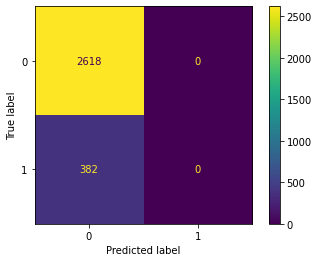

In [129]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 points)
cm = confusion_matrix(target_test_car, prediction_on_test_car, labels=model_SVM4.classes_)
ConfusionMatrixDisplay(cm).plot()

In [130]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 points)
print(classification_report(target_test_car, prediction_on_test_car))

              precision    recall  f1-score   support

          No       0.87      1.00      0.93      2618
         Yes       0.00      0.00      0.00       382

    accuracy                           0.87      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.76      0.87      0.81      3000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP model

In [135]:
#Build MLP model contains two hidden layers: 64 hidden nodes for the first layer, 16 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1. (0.5 points)
model_MLP3 = MLPClassifier(hidden_layer_sizes=(64, 16, 8), random_state=1)
model_MLP3.fit(predictors_train_car, target_train_car)

MLPClassifier(hidden_layer_sizes=(64, 16, 8), random_state=1)

In [136]:
# Make predictions on testing data (0.5 points)
prediction_on_test_car = model_MLP3.predict(predictors_test_car)

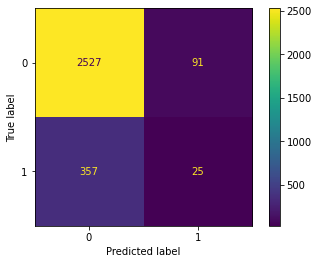

In [137]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 points)
cm = confusion_matrix(target_test_car, prediction_on_test_car, labels=model_MLP3.classes_)
ConfusionMatrixDisplay(cm).plot()

In [138]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 points)
print(classification_report(target_test_car, prediction_on_test_car))

              precision    recall  f1-score   support

          No       0.88      0.97      0.92      2618
         Yes       0.22      0.07      0.10       382

    accuracy                           0.85      3000
   macro avg       0.55      0.52      0.51      3000
weighted avg       0.79      0.85      0.81      3000



Q5. Which model has better performance on carAuction data, SVM or neural network? why? (0.5 points)<br>
Both models have similar accuracy value, which means they have similar overall performances on the testing data. However, the MLP model has higher F-measure on the Yes class, therefore, the MLP is better than the SVM model.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS470_lab/IS470_lab7_solution.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/IS470_sample_solution/IS470_lab7_solution.ipynb to html
[NbConvertApp] Writing 432102 bytes to /content/drive/MyDrive/IS470_sample_solution/IS470_lab7_solution.html
